In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
# Importing the dataset 
dataset = pd.read_csv('train.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [72]:
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# EDA

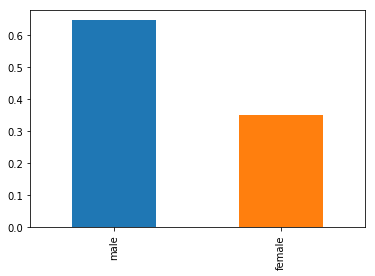

In [73]:
dataset['Sex'].value_counts(normalize = True).plot(kind = 'bar')

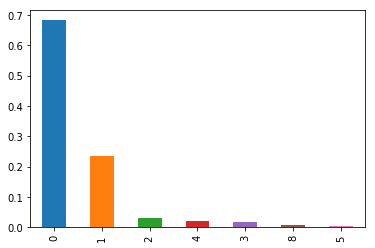

In [74]:
dataset['SibSp'].value_counts(normalize = True).plot(kind = 'bar')

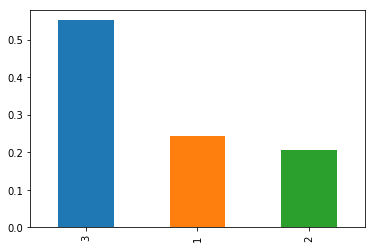

In [75]:
dataset['Pclass'].value_counts(normalize = True).plot(kind = 'bar')

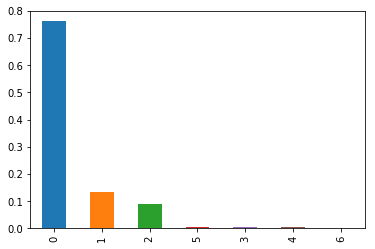

In [76]:
dataset['Parch'].value_counts(normalize = True).plot(kind = 'bar')

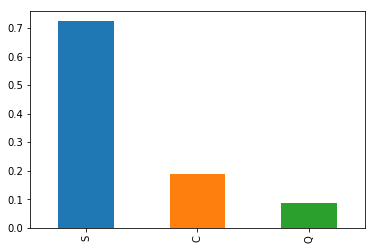

In [77]:
dataset['Embarked'].value_counts(normalize = True).plot(kind = 'bar')

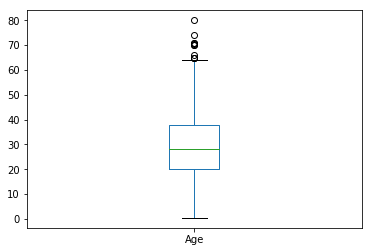

In [78]:
dataset['Age'].plot(kind = 'box')

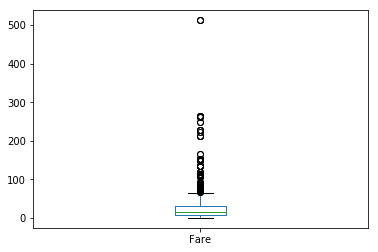

In [79]:
dataset['Fare'].plot(kind = 'box')

# Pre Processing

In [80]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
dataset['Fare'].value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

In [82]:
# droping the unnecessary columns
dataset.pop('Ticket')
dataset.pop('PassengerId')

# To many null values
dataset.pop('Cabin')

# filling missing age values
dataset['Age'].fillna(dataset['Age'].mean())

# dropping the 2 Nan Value in embarked column
dataset.dropna(inplace=True)

# Label Encoding
dataset['Sex'] = dataset['Sex'].map({'male':1,'female':0})

emb = pd.get_dummies(dataset['Embarked'],drop_first=True)
dataset.drop(['Embarked'],axis=1,inplace=True )
dataset = pd.concat([dataset,emb],axis=1)

pclass = pd.get_dummies(dataset['Pclass'],drop_first=True)
dataset.drop(['Pclass'],axis=1,inplace=True )
dataset = pd.concat([dataset,pclass],axis=1)

dataset['Age'] = np.log(dataset['Age'])
dataset['Fare'] = dataset['Fare'] * 10
dataset['Fare'].replace(to_replace=0, value=1, inplace=True)
dataset['Fare'] = np.log(dataset['Fare'])

# Feature Engineering

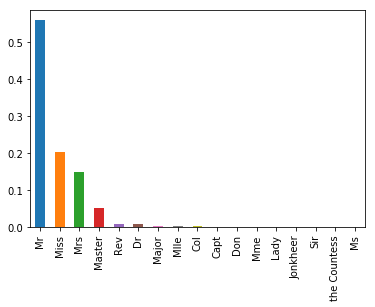

In [83]:
# Name column
title = dataset.pop('Name')
title = title.map(lambda x: x.split(sep=",")[1])
title = title.map(lambda x: x.split(sep='.')[0].strip())
dataset = pd.concat([dataset,title],axis=1)

dataset['Name'].value_counts(normalize = True).plot('bar')

In [84]:
dataset['Name'] = dataset['Name'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset['Name'] = dataset['Name'].replace(['Mlle','Ms'], 'Miss')
dataset['Name'] = dataset['Name'].replace('Mme', 'Mrs')

title = pd.get_dummies(dataset['Name'],drop_first=True)
dataset.drop(['Name'],axis=1,inplace=True )
dataset = pd.concat([dataset,title],axis=1)

In [85]:
dataset.columns

Index(['Survived',      'Sex',      'Age',    'SibSp',    'Parch',     'Fare',
              'Q',        'S',          2,          3,     'Miss',       'Mr',
            'Mrs',     'Rare'],
      dtype='object')

In [86]:
X = dataset[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 
             'S', 2, 3, 'Miss', 'Mr', 'Mrs', 'Rare']]
y = dataset['Survived']

In [87]:
# creating the test and train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [88]:
y_train.value_counts(normalize = True)

0    0.604569
1    0.395431
Name: Survived, dtype: float64

# Model Selection

In [89]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(x_train,y_train)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,classifier.predict(x_test)))

0.8111888111888111


/home/tushar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [90]:
from sklearn.svm import SVC
classifier = SVC(gamma = 'auto')

classifier.fit(x_train,y_train)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,classifier.predict(x_test)))

0.8041958041958042


In [91]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

classifier.fit(x_train,y_train)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,classifier.predict(x_test)))

0.6853146853146853


In [92]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100)

classifier.fit(x_train,y_train)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,classifier.predict(x_test)))

0.7692307692307693


In [93]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators = 100)

classifier.fit(x_train,y_train)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,classifier.predict(x_test)))

0.7832167832167832


In [94]:
dataset['Familysize'] = dataset['Parch'] + dataset['SibSp']
dataset['isAlone'] = dataset['Familysize'].map(lambda x:x<=0)
dataset.pop('Familysize')

0      1
1      1
2      0
3      1
4      0
6      0
7      4
8      2
9      1
10     2
11     0
12     0
13     6
14     0
15     0
16     5
18     1
20     0
21     0
22     0
23     0
24     4
25     6
27     5
30     0
33     0
34     1
35     1
37     0
38     2
      ..
856    2
857    0
858    3
860    2
861    1
862    0
864    0
865    0
866    1
867    0
869    2
870    0
871    2
872    0
873    0
874    1
875    0
876    0
877    0
879    1
880    1
881    0
882    0
883    0
884    0
885    5
886    0
887    0
889    0
890    0
Name: Familysize, Length: 712, dtype: int64

In [95]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca_train = pca.fit_transform(x_train)
pca_test = pca.transform(x_test)

var = pca.explained_variance_ratio_*100
cumsum =  var.cumsum()
var.sum()

85.23900877376052

In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=10)
x_train = lda.fit_transform(x_train,y_train)
x_test = lda.transform(x_test)

In [97]:
from sklearn.svm import SVC
classifier = SVC(gamma = 'auto')

classifier.fit(pca_train,y_train)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,classifier.predict(pca_test)))

0.8041958041958042


In [98]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(x_train,y_train)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,classifier.predict(x_test)))

0.8111888111888111


/home/tushar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [99]:
from sklearn.svm import SVC
classifier = SVC(gamma = 'auto')

classifier.fit(x_train,y_train)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,classifier.predict(x_test)))

0.8181818181818182


In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,classifier.predict(x_test))

array([[72,  8],
       [18, 45]])

In [101]:
from sklearn.model_selection import cross_val_score
res = cross_val_score(classifier,x_test, y_test, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.8110
Accuracy SD: 		 0.1037


# Thank you